In [1]:
import matplotlib.pyplot as plt

import catalog
import matrix

catalog.display_parameters()

## Load the catalog

First we load only the avalanche catalog.

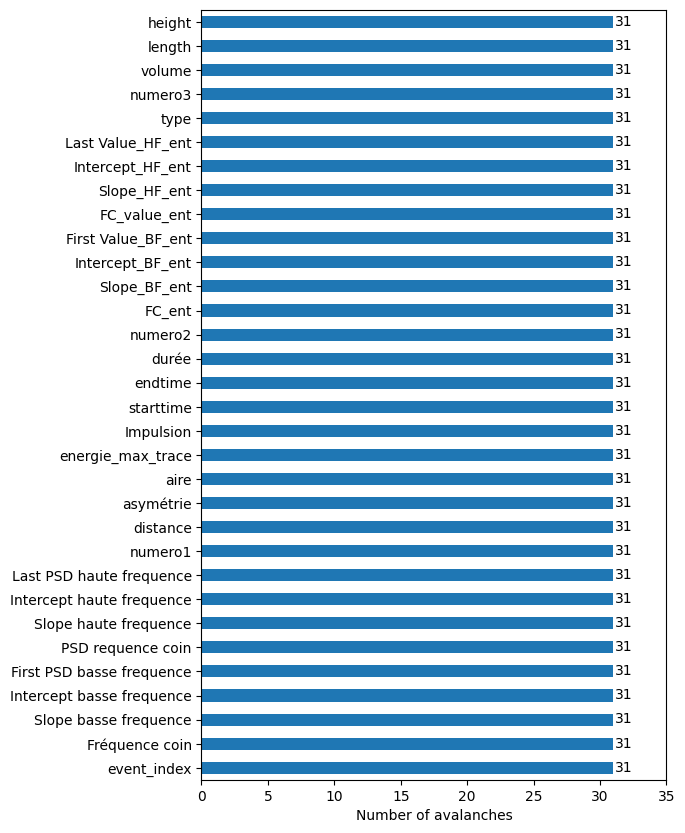

In [2]:
fd = catalog.load("catalog/10_features_dataframe.pickle")

catalog.open_plot(fd, pos_number=0.15, xlim=50) 

In [3]:
# fd = fd[fd["event_index"] != 36]
fd = fd.drop(columns=['numero1'])
fd = fd.drop(columns=['numero2'])
fd = fd.drop(columns=['numero3'])
fd = fd.drop(columns=['starttime'])
fd = fd.drop(columns=['endtime'])
fd = fd.drop(columns=['event_index'])
fd = fd.drop(columns=['distance'])
fd = fd.drop(columns=['type'])
fd = fd.drop(columns=['Impulsion'])
fd = fd.drop(columns=['Intercept basse frequence'])
fd = fd.drop(columns=['Intercept haute frequence'])
fd = fd.drop(columns=['Intercept_BF_ent'])
fd = fd.drop(columns=['Intercept_HF_ent'])

In [4]:
fd = fd.drop(13)
fd

,Fréquence coin,Slope basse frequence,First PSD basse frequence,PSD requence coin,Slope haute frequence,Last PSD haute frequence,asymétrie,aire,energie_max_trace,durée,FC_ent,Slope_BF_ent,First Value_BF_ent,FC_value_ent,Slope_HF_ent,Last Value_HF_ent,volume,length,height
0,1.200000,-1.130638,1.145398e-12,1.991939e-12,-6.884406,6.896227e-19,0.902101,2.305207e-09,8.826329e-11,80.0,6.340793,0.003094,0.619136,0.876625,0.090427,0.760580,54000000.0,5760.0,1860.0
1,1.500000,-2.239824,2.835787e-15,2.418469e-15,-5.302421,8.146083e-20,3.960870,9.127628e-12,1.894704e-13,726.0,8.511064,0.005103,0.486057,0.514846,-0.014223,0.634759,3000000.0,3730.0,931.0
2,1.050000,-1.709768,1.451840e-15,1.893866e-16,-5.616421,2.103155e-21,1.968639,2.845638e-12,9.430729e-14,148.0,7.270909,0.001945,0.434874,0.614271,0.008541,0.779497,2600000.0,2000.0,690.0
3,1.050000,-5.322399,3.928697e-15,3.173081e-16,-3.083978,1.313716e-19,1.298998,8.572617e-12,3.382746e-13,88.0,8.341043,0.005758,0.882726,0.666802,-0.002487,0.953700,1900000.0,4320.0,1240.0
4,2.600000,-0.245153,9.990024e-16,7.898024e-15,-5.364591,1.119058e-18,2.137435,3.068379e-12,7.825895e-14,276.0,6.130766,0.015895,0.662276,0.714135,0.186102,0.685979,46700.0,550.0,560.0
5,1.550000,-3.218066,3.734171e-15,5.791412e-17,-5.277870,1.638337e-20,2.248487,2.790730e-12,9.404596e-14,212.0,5.445681,-0.005236,0.319311,0.355229,0.056486,0.322775,2460000.0,3600.0,1300.0
6,2.010376,0.903609,1.429776e-15,5.395869e-14,-6.066409,1.511075e-20,3.618546,2.583214e-12,1.314871e-13,294.0,8.911114,-0.006789,0.321223,0.320492,0.082726,0.323595,310000.0,2500.0,1300.0
7,1.050000,0.716944,4.872842e-13,6.300358e-13,-4.944716,4.261771e-18,0.997402,1.647212e-09,4.530507e-11,116.0,9.086136,0.014105,0.300792,0.267705,0.051464,0.315076,11000000.0,7800.0,1830.0
8,1.100000,-4.507507,3.510016e-15,1.720535e-16,-6.239395,4.831648e-22,1.204048,1.784279e-12,7.579696e-14,88.0,8.206026,0.009419,0.451976,0.436399,0.025577,0.505112,1700000.0,3500.0,1300.0
9,1.200000,-5.450660,9.254231e-14,1.362840e-15,-4.924537,6.442735e-20,1.547427,7.215473e-11,1.253726e-12,332.0,6.005751,0.014352,0.508714,0.492935,-0.008335,0.554097,8300000.0,1700.0,180.0


In [5]:
columns = []
X = []
Y = []

for column in fd.columns:
    columns.append(fd[column])
    X.append(column)
    Y.append(column)

X = X[:-1]
Y = Y[1:]
X_label = len(X)+1 
Y_label = len(Y)+1

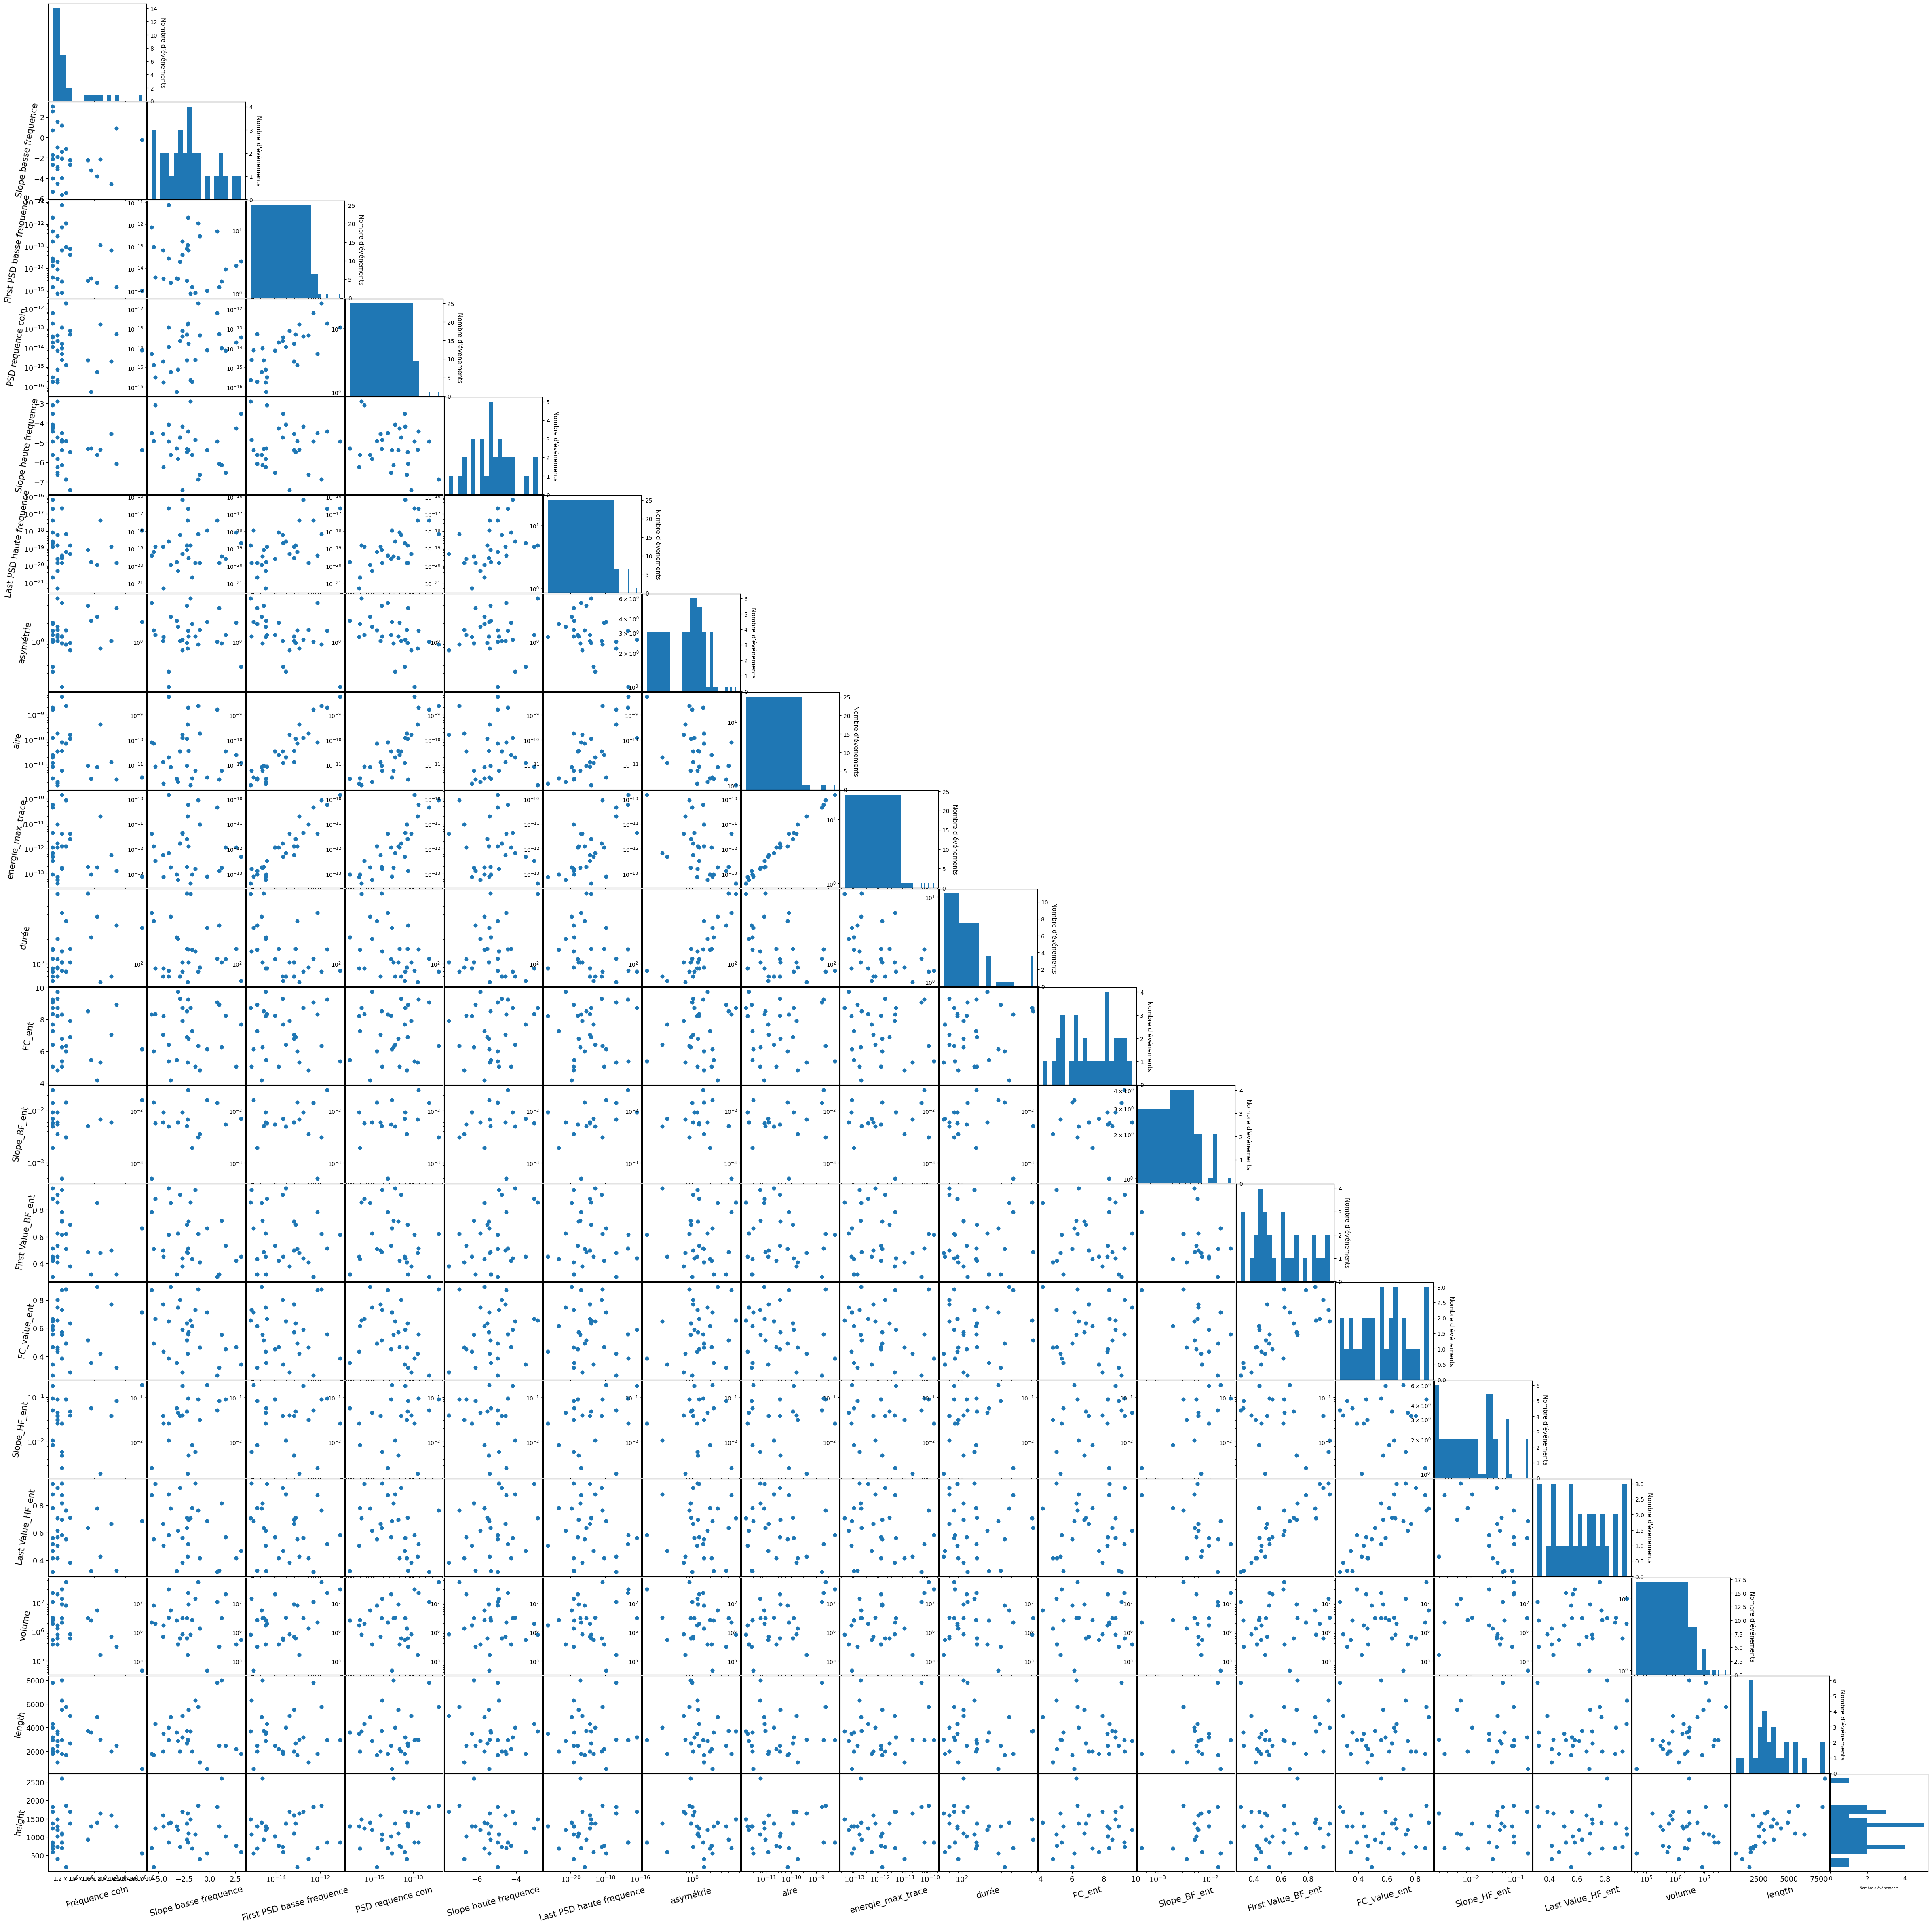

In [6]:
fontsize = 11

fig, axs = plt.subplots(X_label, Y_label, figsize=(60, 60))#, dpi=800)

matrix.remove_fig(fig, axs) #remove all the figures not used
matrix.remove_ticks(X_label, Y_label, axs) #remove all the ticks
matrix.label_size(X_label, Y_label, axs, labelsize = 13)
matrix.labels_scatter(X, Y, X_label, Y_label, axs, fontsize=15) #add labels

for ax in axs.flat:
    ax.xaxis.label.set_rotation(15)  # Rotate x-axis title
    ax.yaxis.label.set_rotation(80) 

for i in range(len(columns)):
     if i == len(columns)-1:
          matrix.histogram_flip(columns[-1], axs=axs[X_label-1, Y_label-1], bin=20, fontsize=6)
          break

     #matrix.histogram(columns[i], axs=axs[i,i], bin=20, fontsize=fontsize) #log
     matrix.histogram_normal(columns[i], axs=axs[i,i], bin=20, fontsize=fontsize)

matrix.plot_results(columns, axs) #PLOT

matrix.set_axe_log(axs, X_label) #REGLAGE AXE LOG

plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.savefig("figures/scatter_matrix_finale3.pdf")
plt.show()